##  Decision trees and ensemble learning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

### Data Preparation

In [3]:
df = pd.read_csv(URL)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df['status'] = df["status"].map(status_values)

In [6]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [11]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [15]:
del df_train['status']
del df_val['status']
del df_test['status']

In [16]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


### Decision trees

In [17]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [18]:
xi = df_train.iloc[0].to_dict()

In [19]:
assess_risk(xi)

'ok'

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [21]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [22]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [25]:
y_pred = dt.predict_proba(X_val)[:,1]

In [26]:
roc_auc_score(y_val, y_pred)

0.6548400377806302

Overfitting : memorizing the data but failing to generalize.

This happens when tree grows too deep. To counter that, we can definet the depth of the tree.

In [27]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [29]:
from sklearn.tree import export_text

In [30]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



### Decision Tree Learning Algorithm

In [31]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


Which threshold to split the dataset in two parts?

In [32]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [33]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [34]:
from IPython.display import display

In [35]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



misclassification rate = impurity. Aim is to have the more pure leaf in a tree. 

|T|Decision Left| Impurity Left | Decision Right | Impurity Right | Avg |
|-|-------------|---------------|----------------|----------------|-----|
|0|Default | 0% | OK | 93 % | 21%|
|2000|Default | 0% | OK | 43 % |16%|
|3000|Default | 0% | OK | 20 % | 10%|
|4000|Default | 25% | OK | 25 % | 25%|
|5000|Default | 50% | OK | 50 % | 50%|
|8000|Default | 43% | OK | 0 % |21% |

Best T = 3000

In [36]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [37]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [38]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}


In [39]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


Let's sum for two features : 

|T|Decision Left| Impurity Left | Decision Right | Impurity Right | Avg |
|-|-------------|---------------|----------------|----------------|-----|
|0|Default | 0% | OK | 93 % | 21%|
|2000|Default | 0% | OK | 43 % |16%|
|3000|Default | 0% | OK | 20 % | 10%|
|4000|Default | 25% | OK | 25 % | 25%|
|5000|Default | 50% | OK | 50 % | 50%|
|8000|Default | 43% | OK | 0 % |21% |
|||||||
|500|OK | 0% | Default | 43% | 21%|
|1000|OK |33% | Default | 0% | 16%|
|2000|OK | 43% | Default | 0% | 21%|

**Finding the best split algorithm :**
- For f in features: 
    - find all thresholds for f
    - for t in thresholds : 
        - split dataset using "F>T" condition
        - compute the impurity of the split
- select the condition with the lowest impurity

**Stopping criteria**
- group already pure
- tree reached depth limit
- group too small to split

**Decision Tree Learning Algorithm**
- Find the best split
- Stop if max_depth is reached
- If left is sufficiently large and not pure :
    - repeat for left
- If right is sufficiently large and not pure :
    - repeat for right

https://scikit-learn.org/stable/modules/tree.html

## Decision Trees parameter tuning

- selecting max_depth
- selecting min_samples_leaf

In [40]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print(f"d = {d} -> auc = {auc} ")

d = 1 -> auc = 0.6058644740984719 
d = 2 -> auc = 0.6685264343319367 
d = 3 -> auc = 0.7389079944782155 
d = 4 -> auc = 0.7612827250490422 
d = 5 -> auc = 0.7669377103969388 
d = 6 -> auc = 0.7521039693880023 
d = 10 -> auc = 0.6763883170666731 
d = 15 -> auc = 0.6592992419655614 
d = 20 -> auc = 0.6484706110290378 
d = None -> auc = 0.6567411784650409 


In [41]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, s, auc))

In [42]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [43]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785319
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.774028
23,6,20,0.773634


In [44]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns = ['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.747
2                 0.761  0.767  0.766
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.773  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

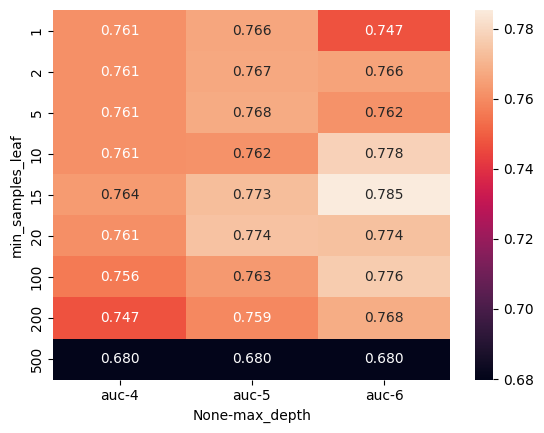

In [45]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [46]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [47]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- income <= 117.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  117.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

## Ensemble Learning and Random Forest

The core principle behind the Random Forest algorithm is to train multiple decision trees and calculate the mean probability obtained from these trees. Each tree is built using a different subset of features to make predictions on probabilities. The concept underlying this approach is that the collective knowledge of multiple experts often outperforms that of a single expert.

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [50]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [51]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [52]:
scores_columns = ["n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=scores_columns)

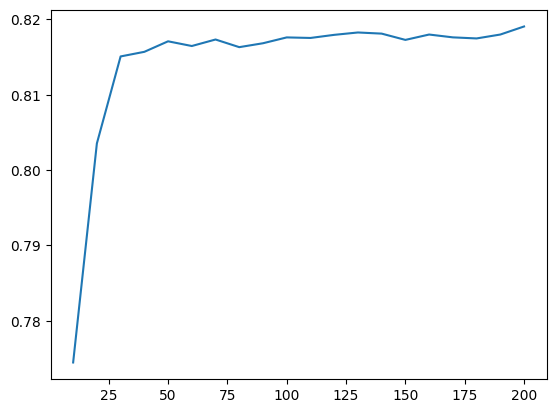

In [53]:
plt.plot(df_scores['n_estimators'], df_scores['auc'])

In [54]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [55]:
scores_columns = ["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=scores_columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


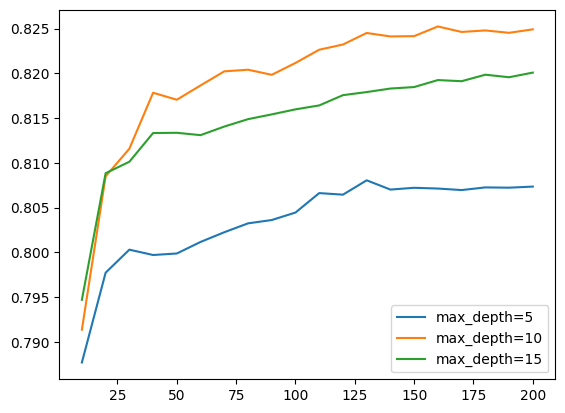

In [56]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset['n_estimators'], df_subset['auc'],
             label = f'max_depth={d}')
plt.legend()

In [57]:
max_depth = 10

In [58]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [59]:
scores_columns = ["min_sample_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=scores_columns)
df_scores.head()

,min_sample_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


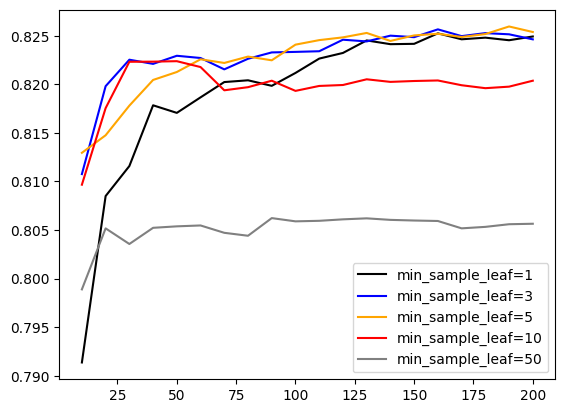

In [60]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, color in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    plt.plot(df_subset['n_estimators'], df_subset['auc'],
             color = color,
             label = f'min_sample_leaf={s}')
plt.legend()

In [61]:
min_samples_leaf = 3

In [62]:
rf = RandomForestClassifier(n_estimators=n, 
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

Parameters interesting to tune :
1) max_depth
2) min_samples_leaf
3) max_features
4) bootstrap

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Gradient boosting and XGBoost

In Boosting, the process begins with the training of an initial model. Subsequently, we train additional models based on the errors of the preceding ones. This sequential procedure can be repeated multiple times. In contrast to Random Forest, which is an ensemble method, Boosting is an iterative and sequential approach.

If decision trees are used as the base model, it's referred to as Gradient Boosting with trees. XGBoost, for instance, is a specific and well-known implementation of the Gradient Boosting technique.

In [63]:
import xgboost as xgb

In [64]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [65]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [66]:
y_pred = model.predict(dval)

In [67]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [68]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [69]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  verbose_eval = 5,
                  evals = watchlist, 
                  num_boost_round=200)

In [70]:
def parse_xgb_output(output):
    results = []
    tree=[]
    aucs_train = []
    aucs_val = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])
        
        results.append((it, train, val))

    columns = ["num_iter", "train_auc", "val_auc"]
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [71]:
df_score = parse_xgb_output(output)

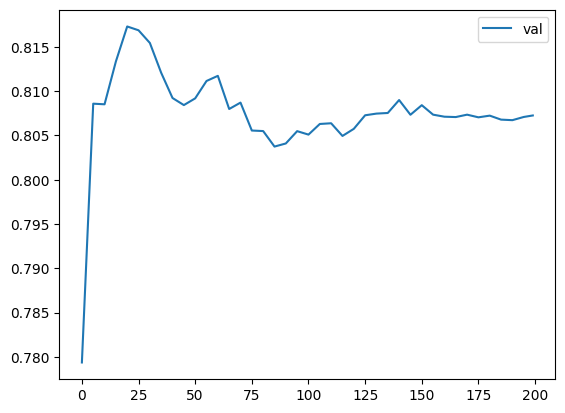

In [72]:
# plt.plot(df_score["num_iter"], df_score["train_auc"], label="train")
plt.plot(df_score["num_iter"], df_score["val_auc"], label="val")
plt.legend()

### XGBoost Parameter Tuning

1) eta

In [73]:
scores = {}

In [89]:
%%capture output

xgb_params = {
    "eta": 0.01,
    "max_depth": 6,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  verbose_eval = 5,
                  evals = watchlist, 
                  num_boost_round=200)

eta is also called learning rate. 

In [90]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)

In [91]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

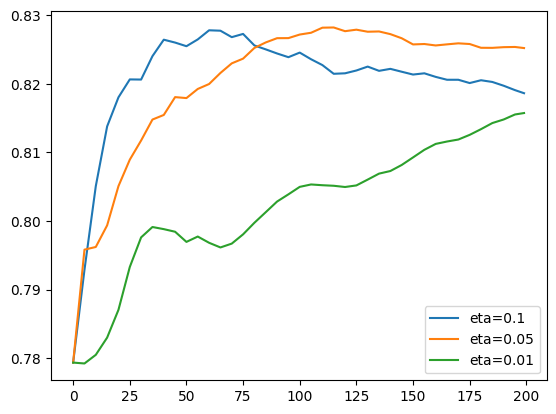

In [95]:
etas = ["eta=0.1", "eta=0.05", "eta=0.01"]

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score["num_iter"], df_score["val_auc"], label=eta)
plt.legend()

2) max_depth

In [96]:
scores = {}

In [103]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 10,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  verbose_eval = 5,
                  evals = watchlist, 
                  num_boost_round=200)

In [104]:
key = f"max_depth={xgb_params['max_depth']}"
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [105]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

In [108]:
del scores['max_depth=10']

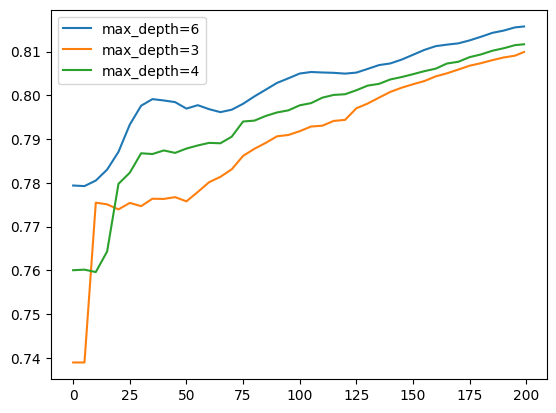

In [111]:
for max_depth, df_score in scores.items():
    plt.plot(df_score["num_iter"], df_score["val_auc"], label=max_depth)
plt.legend()

3) min_child_weight

In [118]:
scores = {}

In [123]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, 
                  verbose_eval = 5,
                  evals = watchlist, 
                  num_boost_round=200)

In [124]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

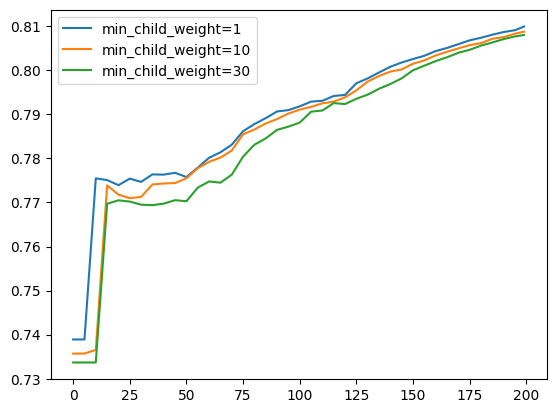

In [125]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score["num_iter"], df_score["val_auc"], label=min_child_weight)
plt.legend()

4) Final model

In [126]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

- Useful ones :
    - subsample and colsample_bytree
    - lambda and alpha

https://xgboost.readthedocs.io/en/latest/parameter.html

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

### Selecting the best model

In [127]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [128]:
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [148]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [130]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7852498123077667

In [131]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [149]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8309347073212081

In [133]:
df_full_train = df_full_train.reset_index(drop=True)

In [134]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [136]:
del df_full_train['status']

In [137]:
dicts_full_train = df_full_train.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)


dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [140]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [145]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "eval_metric": "auc",
    
    "nthread": 8,
    "seed": 1,
    "verbosity": 1, 
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [146]:
y_pred = model.predict(dtest)

In [147]:
roc_auc_score(y_test, y_pred)

0.8289367577342261